# <font color = 'blue'> House Price Prediction
    
### Problem statement

To build a regression model  for US based company Surparise Housing who have expanded thier market in Australia 
with help of regularisation in order to predict actual value of prospective properties and based on that
they would take the decision weather they would invest  in the properties or not. 

# Business Goal : 
A)Which variables are significant in predicting the price of a house, and

b)How well those variables describe the price of a house.

# Library : All required libraries are imported in below cell

In [1]:
import numpy as np 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import seaborn as sns

from collections import Counter
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

## Step 1: Reading and Understanding the Data

### <font color='blue'> Data Sourcing

In [3]:
df = pd.read_csv("train.csv")

In [4]:
print(df.shape)
df.head(5)

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# <font color='green'> There are many null values present in data

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
#stats of the predictor variable (saleprice)
df.SalePrice.describe().round(2)

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

# Step 2 :Data Cleaning and Preparation

In [9]:
df[['YearBuilt','GarageYrBlt']].head() # both are having same values

YearBuilt  GarageYrBlt
0       2003       2003.0
1       1976       1976.0
2       2001       2001.0
3       1915       1998.0
4       2000       2000.0

In [10]:
df = df.drop(['GarageYrBlt'] , axis=1)

In [11]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
    
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : ", higher_miss_value_column)
    else:
        print("There are no Higher Column Missing values in Dataset")
                
                    

In [12]:
get_percentage_miss_value(df)

Column->  LotFrontage , total no of missing value :  259  & :          17.74  %
Column->  Alley , total no of missing value :  1369  & :          93.77  %
Column->  MasVnrType , total no of missing value :  8  & :          0.55  %
Column->  MasVnrArea , total no of missing value :  8  & :          0.55  %
Column->  BsmtQual , total no of missing value :  37  & :          2.53  %
Column->  BsmtCond , total no of missing value :  37  & :          2.53  %
Column->  BsmtExposure , total no of missing value :  38  & :          2.6  %
Column->  BsmtFinType1 , total no of missing value :  37  & :          2.53  %
Column->  BsmtFinType2 , total no of missing value :  38  & :          2.6  %
Column->  FireplaceQu , total no of missing value :  690  & :          47.26  %
Column->  GarageType , total no of missing value :  81  & :          5.55  %
Column->  GarageFinish , total no of missing value :  81  & :          5.55  %
Column->  GarageQual , total no of missing value :  81  & :          5.5

# <font color='green'> Checking : How much Missing values present in percentage (if missing value present more than 60 % , so i am dropping the columns)

In [13]:
1150 / len(df) #checking : example for imbalance columns

0.7876712328767124

# <font color='green'> Checking Below: If any values present in data more 75 % , so I am droping the columns with help of Visualization and % of value in data 

In [14]:
def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            
            print("*"*100)
            print("\n")

In [15]:
check_cloumn_details_type_categorical(df)

Columns name :   MSZoning
{'RL': 1151, 'RM': 218, 'C (all)': 10, 'FV': 65, 'RH': 16}
****************************************************************************************************


Columns name :   Street
{'Pave': 1454, 'Grvl': 6}
****************************************************************************************************


Columns name :   Alley
{nan: 1369, 'Grvl': 50, 'Pave': 41}
****************************************************************************************************


Columns name :   LotShape
{'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}
****************************************************************************************************


Columns name :   LandContour
{'Lvl': 1311, 'Bnk': 63, 'Low': 36, 'HLS': 50}
****************************************************************************************************


Columns name :   Utilities
{'AllPub': 1459, 'NoSeWa': 1}
*************************************************************************************

In [16]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")

In [17]:
check_cloumn_details_type_numberical(df)

Columns name :   Id
{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1,

In [18]:
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
    

In [19]:
check_cloumn_details_type_float(df)

Columns name :   LotFrontage
{65.0: 44, 80.0: 69, 68.0: 19, 60.0: 143, 84.0: 9, 85.0: 40, 75.0: 53, nan: 1, 51.0: 15, 50.0: 57, 70.0: 70, nan: 1, 91.0: 6, nan: 1, nan: 1, 72.0: 17, 66.0: 15, 101.0: 2, 57.0: 12, 44.0: 9, nan: 1, 110.0: 6, 98.0: 8, 47.0: 5, nan: 1, 108.0: 3, 112.0: 1, 74.0: 15, 115.0: 2, nan: 1, nan: 1, 61.0: 8, 48.0: 6, 33.0: 1, nan: 1, 52.0: 14, 100.0: 16, 24.0: 19, 89.0: 6, 63.0: 17, nan: 1, 76.0: 11, nan: 1, 81.0: 6, 95.0: 7, 69.0: 11, 21.0: 23, nan: 1, 32.0: 5, 78.0: 25, nan: 1, 121.0: 2, 122.0: 2, 40.0: 12, 105.0: 6, nan: 1, 73.0: 18, 77.0: 9, nan: 1, 64.0: 19, 94.0: 6, nan: 1, nan: 1, nan: 1, 34.0: 10, nan: 1, 90.0: 23, nan: 1, 55.0: 17, nan: 1, 88.0: 10, nan: 1, nan: 1, nan: 1, 82.0: 12, 71.0: 12, nan: 1, nan: 1, 120.0: 7, 107.0: 7, nan: 1, nan: 1, 92.0: 10, 134.0: 2, nan: 1, 62.0: 9, nan: 1, 86.0: 10, nan: 1, nan: 1, 141.0: 1, 97.0: 2, nan: 1, nan: 1, 54.0: 6, nan: 1, 41.0: 6, nan: 1, 79.0: 17, 174.0: 2, nan: 1, 99.0: 3, nan: 1, nan: 1, 67.0: 12, 83.0: 5, 43.0: 

In [20]:
def visualize_categorical_values(dataset):
    no_of_columns = 4
    no_of_rows = 4
    
    columns_object_type = [i for i in dataset.columns  if dataset[i].dtype == "object"]
    total_rows = (len(columns_object_type) // no_of_rows ) + 1
    
    f, axes = plt.subplots(total_rows, no_of_columns, figsize=(18,24))

    for ind, val in enumerate(columns_object_type):
        sns.countplot(df[val] , ax = axes[ind // no_of_rows , ind %no_of_columns ])
    plt.show()   
    

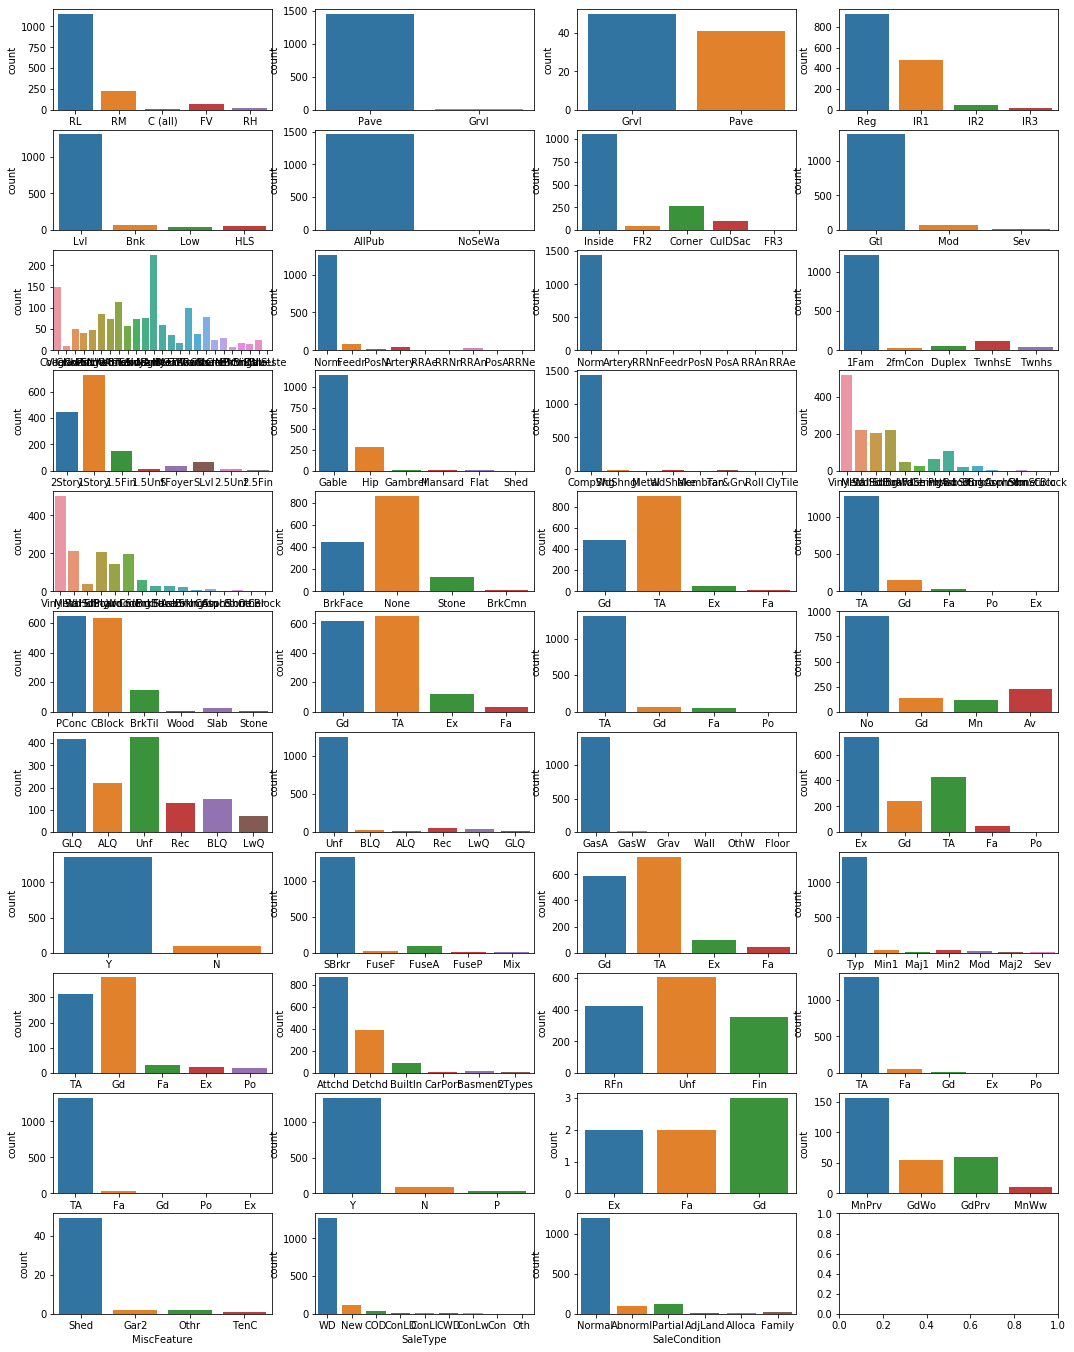

In [21]:
visualize_categorical_values(df)

In [22]:
drop_column = ["Id","Street" , "Alley" ,"Utilities" , "LandSlope", "Condition2", "RoofMatl", "BsmtCond", "Heating",
              "CentralAir", "Electrical", "GarageQual" ,"GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
              "MSZoning", "LandContour", "Condition1" ,"BldgType" , "RoofStyle", "ExterCond", "BsmtFinType2",
               "Functional" , "SaleCondition" , "SaleType", "FireplaceQu"]

print(len(drop_column))

28


# <font color='Green'> Dropping the columns

In [23]:
df1 = df.drop(columns= drop_column , axis=1)
df1.shape

(1460, 52)

In [24]:
df1.head()

MSSubClass  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60         65.0     8450      Reg    Inside      CollgCr   
1          20         80.0     9600      Reg       FR2      Veenker   
2          60         68.0    11250      IR1    Inside      CollgCr   
3          70         60.0     9550      IR1    Corner      Crawfor   
4          60         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond  YearBuilt  ...  WoodDeckSF  \
0     2Story            7            5       2003  ...           0   
1     1Story            6            8       1976  ...         298   
2     2Story            7            5       2001  ...           0   
3     2Story            7            5       1915  ...           0   
4     2Story            8            5       2000  ...         192   

  OpenPorchSF EnclosedPorch 3SsnPorch  ScreenPorch PoolArea MiscVal MoSold  \
0          61             0         0            0        0       0      2   
1           0             0         0            0        0       0      5   
2          42             0         0            0        0       0      9   
3          35           272         0            0        0       0      2   
4          84             0         0            0        0       0     12   

  YrSold SalePrice  
0   2008    208500  
1   2007    181500  
2   2008    223500  
3   2006    140000  
4   2008    250000  

[5 rows x 52 columns]

# <font color='Green'> 2.1 Data Treatment: Filling Missing values(Numberical & Catgorical)

In [25]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

# <font color='Blue'> Numberical Missing Value Replacing with Mean & Categorical Missing Value Replacing with Mode(0)

In [26]:
df2 = DataFrameImputer().fit_transform(df1)
print(df2.shape)
df2.head()

(1460, 52)


MSSubClass  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60         65.0     8450      Reg    Inside      CollgCr   
1          20         80.0     9600      Reg       FR2      Veenker   
2          60         68.0    11250      IR1    Inside      CollgCr   
3          70         60.0     9550      IR1    Corner      Crawfor   
4          60         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond  YearBuilt  ...  WoodDeckSF  \
0     2Story            7            5       2003  ...           0   
1     1Story            6            8       1976  ...         298   
2     2Story            7            5       2001  ...           0   
3     2Story            7            5       1915  ...           0   
4     2Story            8            5       2000  ...         192   

  OpenPorchSF EnclosedPorch 3SsnPorch  ScreenPorch PoolArea MiscVal MoSold  \
0          61             0         0            0        0       0      2   
1           0             0         0            0        0       0      5   
2          42             0         0            0        0       0      9   
3          35           272         0            0        0       0      2   
4          84             0         0            0        0       0     12   

  YrSold SalePrice  
0   2008    208500  
1   2007    181500  
2   2008    223500  
3   2006    140000  
4   2008    250000  

[5 rows x 52 columns]

# <font color='blue'> 2.2 After Visualization of counter plot and checked values details 1 by 1(again Repeating step)

In [27]:
get_percentage_miss_value(df2)





There are no Higher Column Missing values in Dataset


# <font color='green'> There are no Higher values Missing in Columns,Dataset

In [28]:
925 / 1460 # example for Imbalanced Column

0.6335616438356164

In [29]:
check_cloumn_details_type_categorical(df2)

Columns name :   LotShape
{'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}
****************************************************************************************************


Columns name :   LotConfig
{'Inside': 1052, 'FR2': 47, 'Corner': 263, 'CulDSac': 94, 'FR3': 4}
****************************************************************************************************


Columns name :   Neighborhood
{'CollgCr': 150, 'Veenker': 11, 'Crawfor': 51, 'NoRidge': 41, 'Mitchel': 49, 'Somerst': 86, 'NWAmes': 73, 'OldTown': 113, 'BrkSide': 58, 'Sawyer': 74, 'NridgHt': 77, 'NAmes': 225, 'SawyerW': 59, 'IDOTRR': 37, 'MeadowV': 17, 'Edwards': 100, 'Timber': 38, 'Gilbert': 79, 'StoneBr': 25, 'ClearCr': 28, 'NPkVill': 9, 'Blmngtn': 17, 'BrDale': 16, 'SWISU': 25, 'Blueste': 2}
****************************************************************************************************


Columns name :   HouseStyle
{'2Story': 445, '1Story': 726, '1.5Fin': 154, '1.5Unf': 14, 'SFoyer': 37, 'SLvl': 65, '2.5Unf': 

In [30]:
check_cloumn_details_type_numberical(df2)


Columns name :   MSSubClass
{60: 299, 20: 536, 70: 60, 50: 144, 190: 30, 45: 12, 90: 52, 120: 87, 30: 69, 85: 20, 80: 58, 160: 63, 75: 16, 180: 10, 40: 4}
****************************************************************************************************


Columns name :   LotArea
{8450: 6, 9600: 24, 11250: 4, 9550: 1, 14260: 1, 14115: 3, 10084: 2, 10382: 2, 6120: 8, 7420: 2, 11200: 2, 11924: 1, 12968: 1, 10652: 1, 10920: 1, 11241: 1, 10791: 1, 13695: 2, 7560: 2, 14215: 1, 7449: 1, 9742: 1, 4224: 2, 8246: 1, 14230: 1, 7200: 25, 11478: 1, 16321: 1, 6324: 1, 8500: 4, 8544: 4, 11049: 1, 10552: 1, 7313: 1, 13418: 1, 10859: 1, 8532: 1, 7922: 1, 6040: 1, 8658: 1, 16905: 1, 9180: 1, 9200: 3, 7945: 1, 7658: 1, 12822: 1, 11096: 1, 4456: 1, 7742: 1, 13869: 1, 6240: 8, 8472: 1, 50271: 1, 7134: 1, 10175: 1, 2645: 2, 11645: 2, 13682: 1, 13072: 2, 6442: 1, 10300: 1, 9375: 4, 9591: 2, 19900: 1, 10665: 1, 4608: 1, 15593: 1, 13651: 1, 7599: 1, 10141: 1, 10200: 3, 5790: 1, 1596: 1, 8475: 1, 8635: 1, 10

In [31]:
check_cloumn_details_type_float(df2)

Columns name :   LotFrontage
{65.0: 44, 80.0: 69, 68.0: 19, 60.0: 143, 84.0: 9, 85.0: 40, 75.0: 53, 70.04995836802665: 259, 51.0: 15, 50.0: 57, 70.0: 70, 91.0: 6, 72.0: 17, 66.0: 15, 101.0: 2, 57.0: 12, 44.0: 9, 110.0: 6, 98.0: 8, 47.0: 5, 108.0: 3, 112.0: 1, 74.0: 15, 115.0: 2, 61.0: 8, 48.0: 6, 33.0: 1, 52.0: 14, 100.0: 16, 24.0: 19, 89.0: 6, 63.0: 17, 76.0: 11, 81.0: 6, 95.0: 7, 69.0: 11, 21.0: 23, 32.0: 5, 78.0: 25, 121.0: 2, 122.0: 2, 40.0: 12, 105.0: 6, 73.0: 18, 77.0: 9, 64.0: 19, 94.0: 6, 34.0: 10, 90.0: 23, 55.0: 17, 88.0: 10, 82.0: 12, 71.0: 12, 120.0: 7, 107.0: 7, 92.0: 10, 134.0: 2, 62.0: 9, 86.0: 10, 141.0: 1, 97.0: 2, 54.0: 6, 41.0: 6, 79.0: 17, 174.0: 2, 99.0: 3, 67.0: 12, 83.0: 5, 43.0: 12, 103.0: 3, 93.0: 8, 30.0: 6, 129.0: 2, 140.0: 1, 35.0: 9, 37.0: 5, 118.0: 2, 87.0: 5, 116.0: 2, 150.0: 1, 111.0: 1, 49.0: 4, 96.0: 8, 59.0: 13, 36.0: 6, 56.0: 5, 102.0: 4, 58.0: 7, 38.0: 1, 109.0: 2, 130.0: 3, 53.0: 10, 137.0: 1, 45.0: 3, 106.0: 1, 104.0: 3, 42.0: 4, 39.0: 1, 144.0: 1

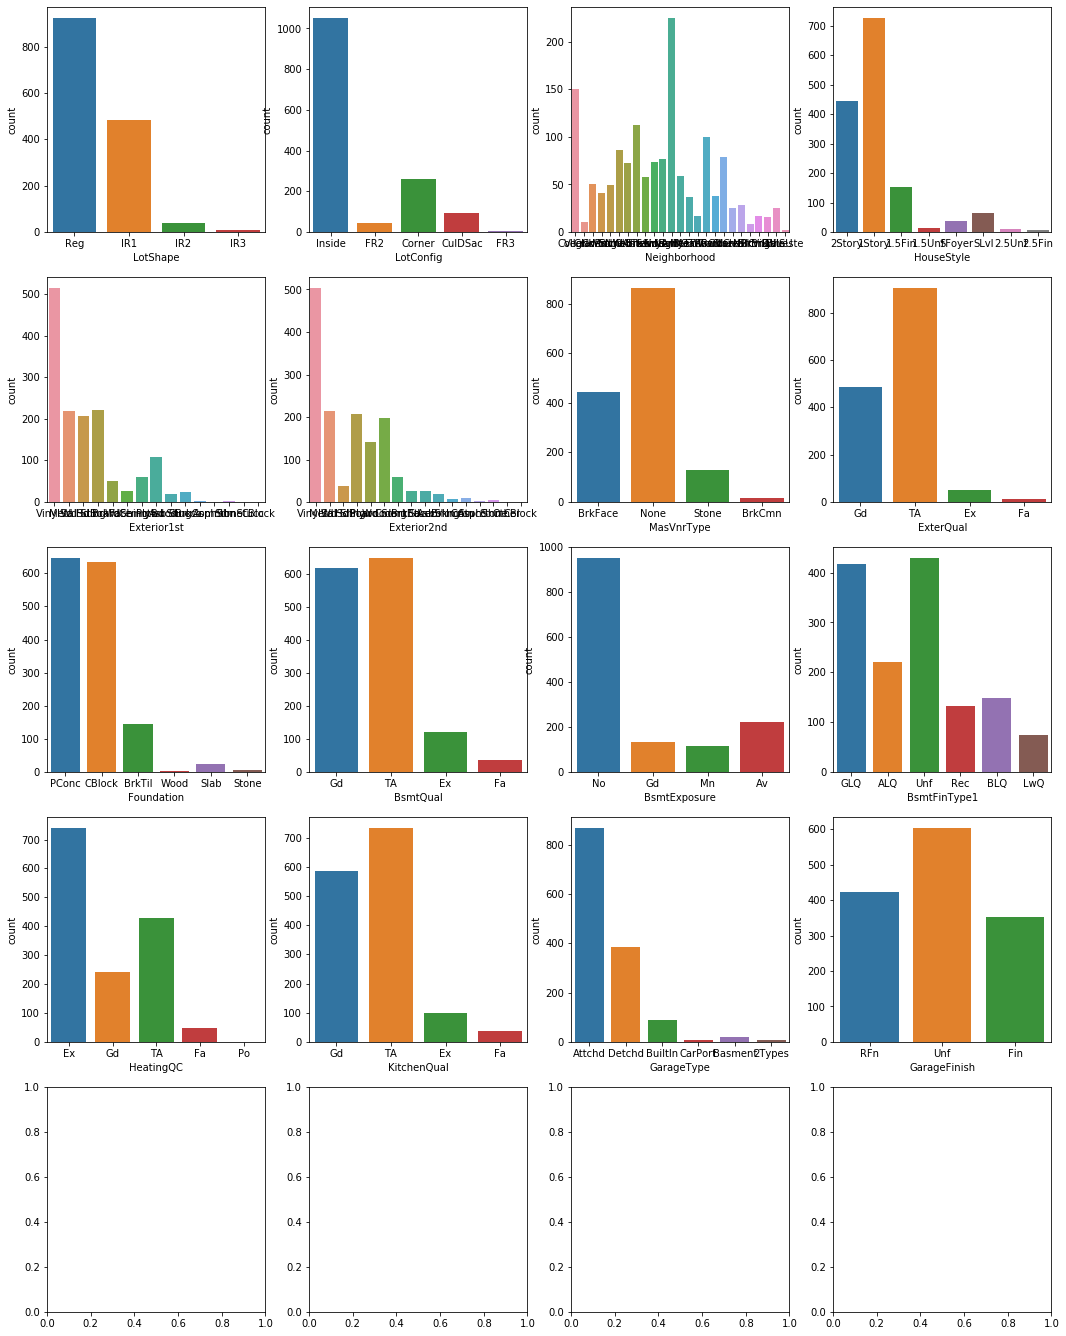

In [32]:
visualize_categorical_values(df2)

In [33]:
df2.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

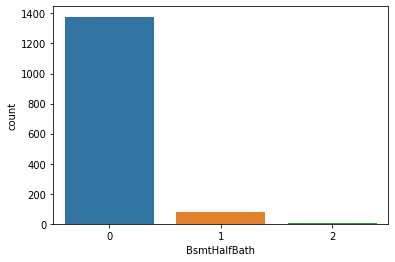

In [34]:
sns.countplot(df2.BsmtHalfBath)

In [35]:
df2.isna().sum().sum()

0

# <font color='Green'> 2.3 After Visualization & Checked Values (Again Dropping some columns, Because Imbalanced Column)

In [36]:
drop_column_1 = ["LotConfig", "BsmtExposure", "GarageType" , "BsmtFinSF2" , "LowQualFinSF", "BsmtHalfBath" , "KitchenAbvGr",
"EnclosedPorch", "3SsnPorch", "ScreenPorch" , "PoolArea", "MiscVal"]

print(len(drop_column_1))

12


# <font color='Green'> Dropping the columns


In [37]:
df2 = df2.drop(columns= drop_column_1 , axis=1)
df2.shape

(1460, 40)

# Step 3: Visualising the Data

To identify 
- If there is some obvious multicollinearity going on
- If some predictors directly have a strong association with the outcome variable

skew is 1.8828757597682129


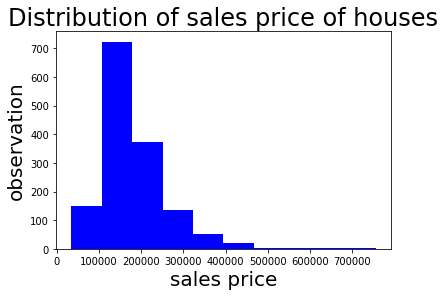

In [38]:
#analysing the distribution of sale price
print('skew is', df2.SalePrice.skew())   
plt.hist(df2['SalePrice'], color= 'b')

plt.title('Distribution of sales price of houses', fontsize = 24)
plt.ylabel('observation', fontsize = 20)
plt.xlabel('sales price', fontsize = 20)

plt.show()

In [39]:
#log transforming sale price to transform it into gaussian distribution
target = np.log(df2.SalePrice)

skew is 0.12133506220520406


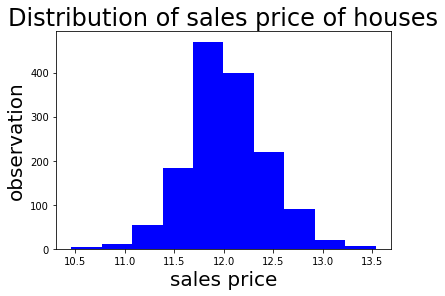

In [40]:
print('skew is', target.skew())
plt.hist(target, color= 'b')

plt.title('Distribution of sales price of houses', fontsize = 24)
plt.ylabel('observation', fontsize = 20)
plt.xlabel('sales price', fontsize = 20)

plt.show()

# <font color='blue'> 3.1 Visualising Numeric Variables

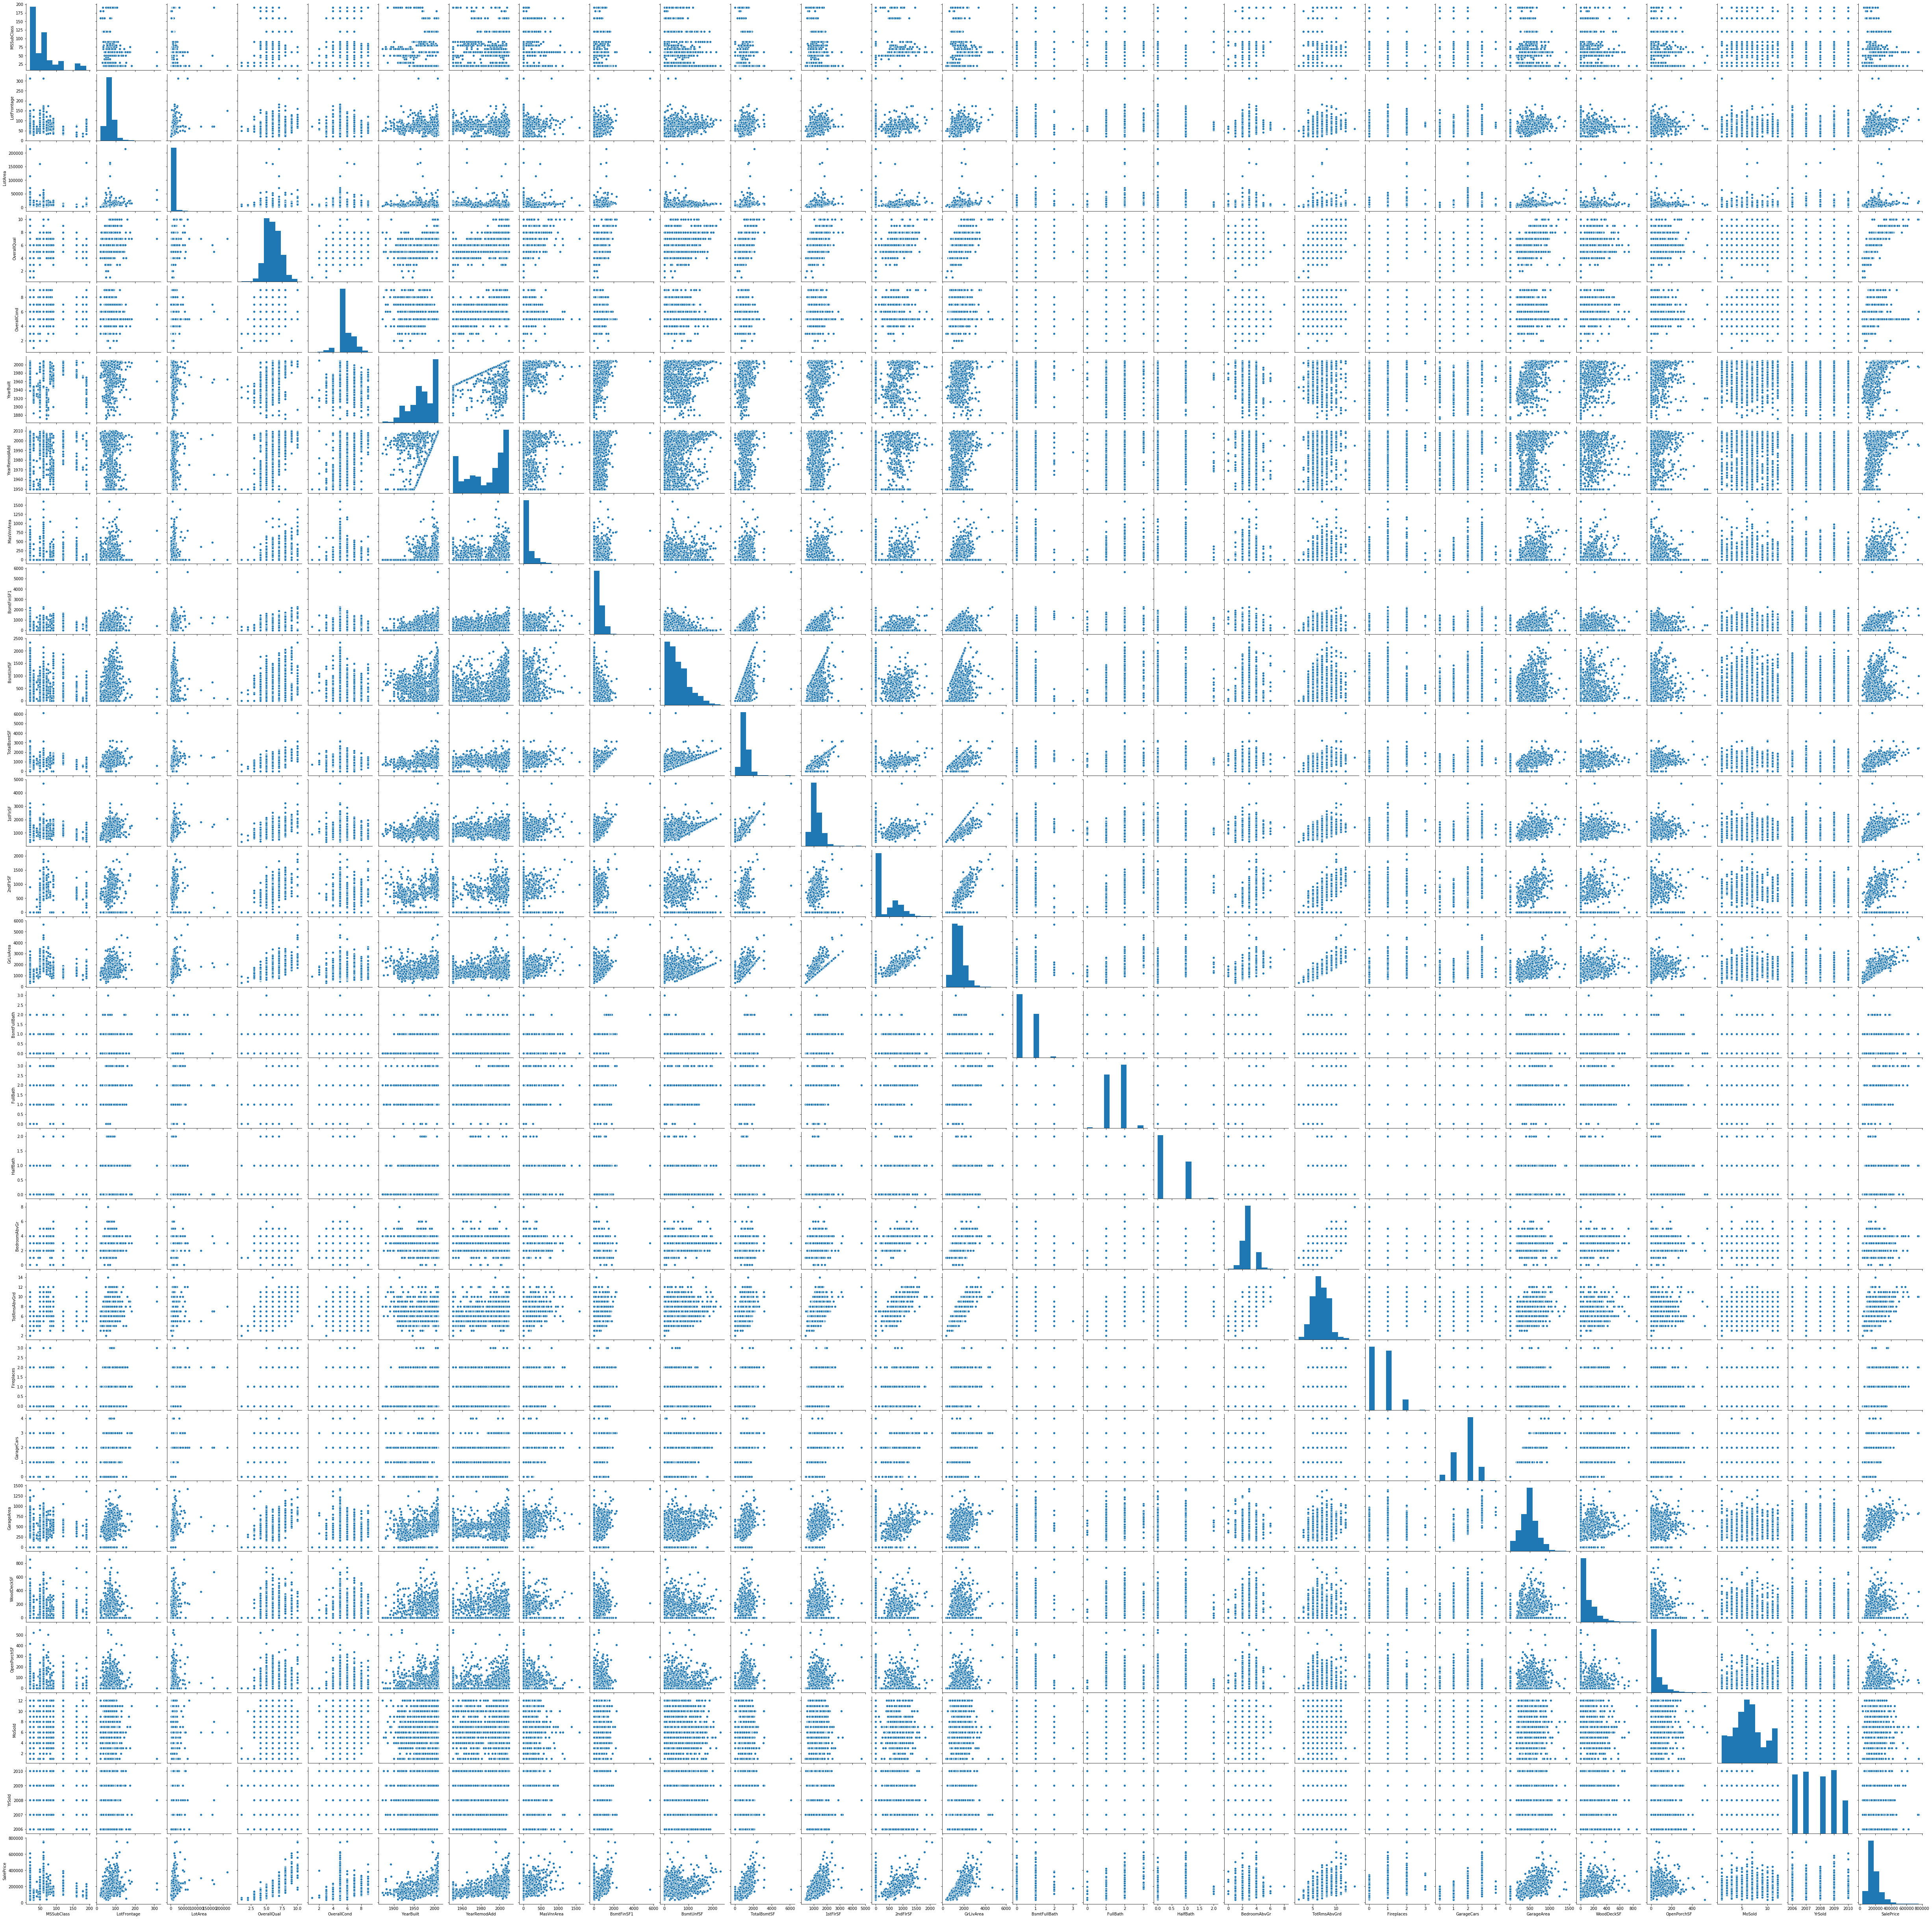

In [41]:
sns.pairplot(df2)
plt.show()

# <font color ='green'> Since pairplots for all numeric values together are not clear we can make groups , do plot with price and analyse

In [41]:
# considering car dimensions first , such as length , widhth , height and weight

def pair_plot(list_4_numberical_values):
    sns.pairplot(df2, x_vars= list_4_numberical_values, y_vars='SalePrice',size=4, kind='scatter')
    plt.show()



In [42]:
numberical_int_columns = []
for i in df2.columns:
    if df2[i].dtype == "int":
        numberical_int_columns.append(i)
        
numberical_float_columns = []
for i in df2.columns:
    if df2[i].dtype == "float":
        numberical_float_columns.append(i)
        

In [43]:
print(len(numberical_int_columns))
print(len(numberical_float_columns))

25
2


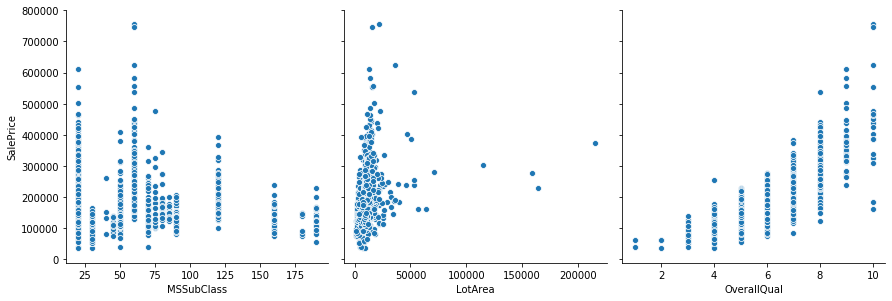

In [44]:
pair_plot(numberical_int_columns[0:3])

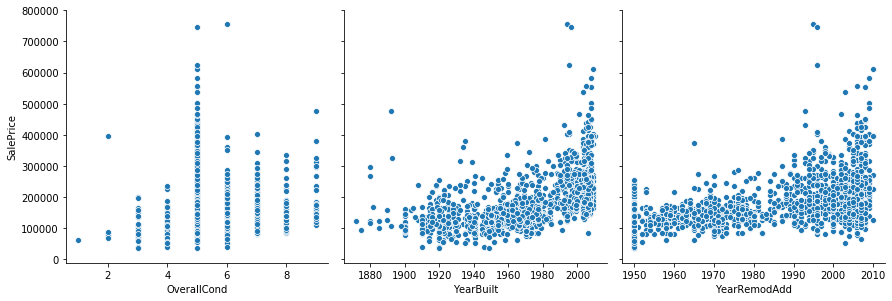

In [45]:
pair_plot(numberical_int_columns[3:6])

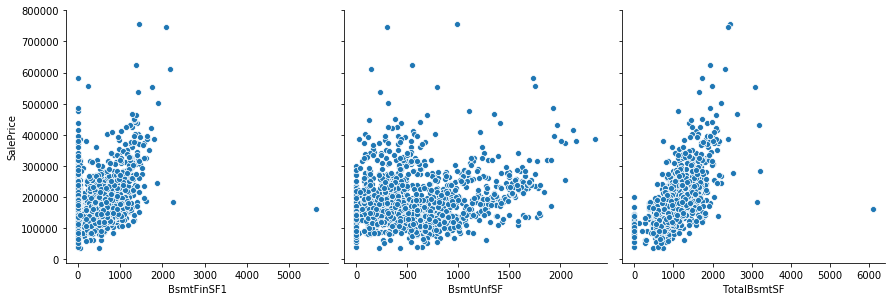

In [46]:
pair_plot(numberical_int_columns[6:9])

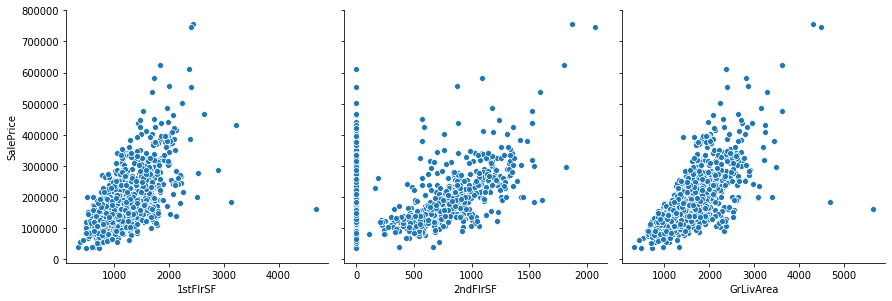

In [47]:
pair_plot(numberical_int_columns[9:12])

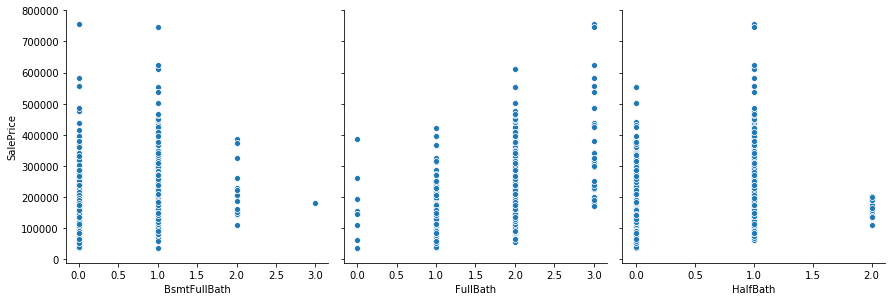

In [48]:
pair_plot(numberical_int_columns[12:15])

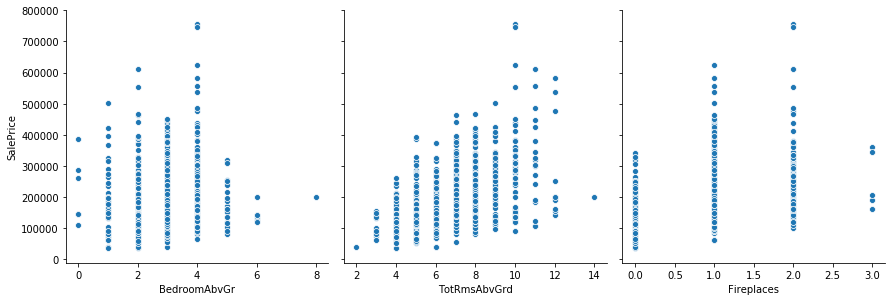

In [49]:
pair_plot(numberical_int_columns[15:18])

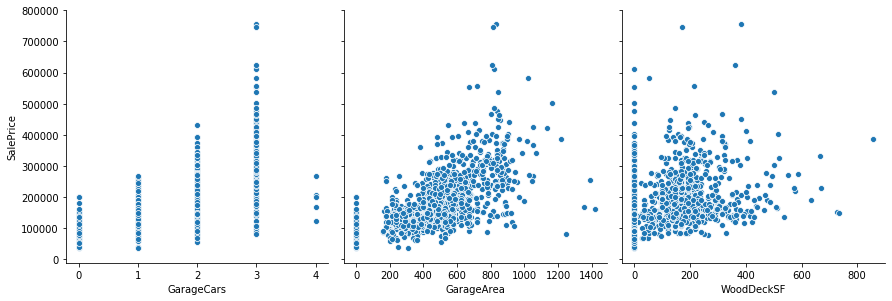

In [50]:
pair_plot(numberical_int_columns[18:21])

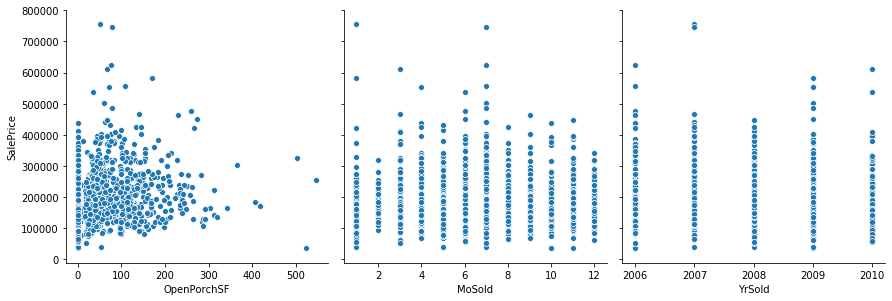

In [51]:
pair_plot(numberical_int_columns[21:24])

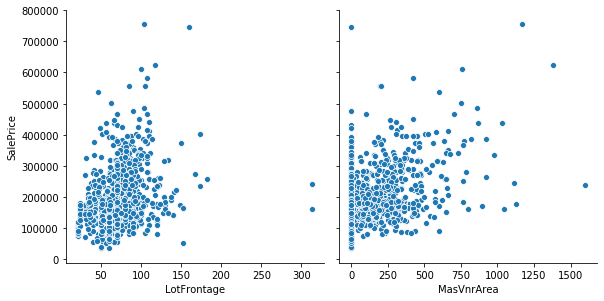

In [52]:
pair_plot(numberical_float_columns[0 : 3])

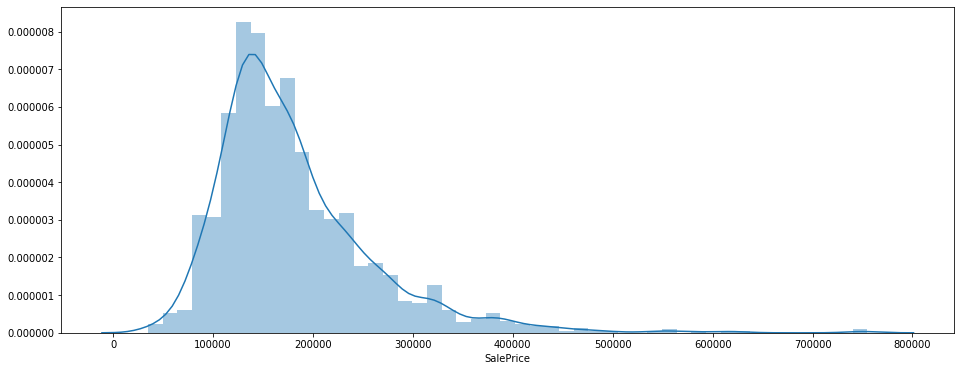

In [53]:
## checking the distribution of Target variable : 

plt.figure(figsize=(16,6))
sns.distplot(df2.SalePrice)
plt.show()

# <font color ='Red' > Removing Outlier

In [54]:
def drop_outliers(x, columns_name):
    list = []
    for chk in columns_name:
        Q1 = x[chk].quantile(.25)
        Q3 = x[chk].quantile(.75)
        IQR = Q3-Q1
        x =  x[(x[chk] >= (Q1-(1.5*IQR))) & (x[chk] <= (Q3+(1.5*IQR)))] 
    return x   

In [55]:
dataframe_columns_name = numberical_float_columns + numberical_int_columns
print(dataframe_columns_name)

['LotFrontage', 'MasVnrArea', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']


In [56]:

df2 = drop_outliers(df2, dataframe_columns_name)

In [57]:
df2[dataframe_columns_name].head()

LotFrontage  MasVnrArea  MSSubClass  LotArea  OverallQual  OverallCond  \
0         65.0       196.0          60     8450            7            5   
2         68.0       162.0          60    11250            7            5   
3         60.0         0.0          70     9550            7            5   
4         84.0       350.0          60    14260            8            5   
5         85.0         0.0          50    14115            5            5   

   YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtUnfSF  ...  BedroomAbvGr  \
0       2003          2003         706        150  ...             3   
2       2001          2002         486        434  ...             3   
3       1915          1970         216        540  ...             3   
4       2000          2000         655        490  ...             4   
5       1993          1995         732         64  ...             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2         548           0           61   
2             6           1           2         608           0           42   
3             7           1           3         642           0           35   
4             9           1           3         836         192           84   
5             5           0           2         480          40           30   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  
5      10    2009     143000  

[5 rows x 27 columns]

In [58]:
df2.shape

(849, 40)

# <font color ='blue' > 3.3 Correlation Matrix for numeric variables


In [59]:
#seeking only the numeric features from the data
numeric_features = df2.select_dtypes(include = [np.number])
numeric_features.dtypes


MSSubClass        int64
LotFrontage     float64
LotArea           int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
BsmtFullBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
MoSold            int64
YrSold            int64
SalePrice         int64
dtype: object

In [60]:
#features with the most correlation with the predictor variable
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending = False)[:5], '\n')
print(corr['SalePrice'].sort_values(ascending = False)[-5:])

SalePrice      1.000000
OverallQual    0.800052
GrLivArea      0.709500
YearBuilt      0.685921
FullBath       0.639907
Name: SalePrice, dtype: float64 

BsmtFinSF1      0.200106
BsmtFullBath    0.140576
MoSold          0.070594
YrSold         -0.034976
OverallCond    -0.247170
Name: SalePrice, dtype: float64


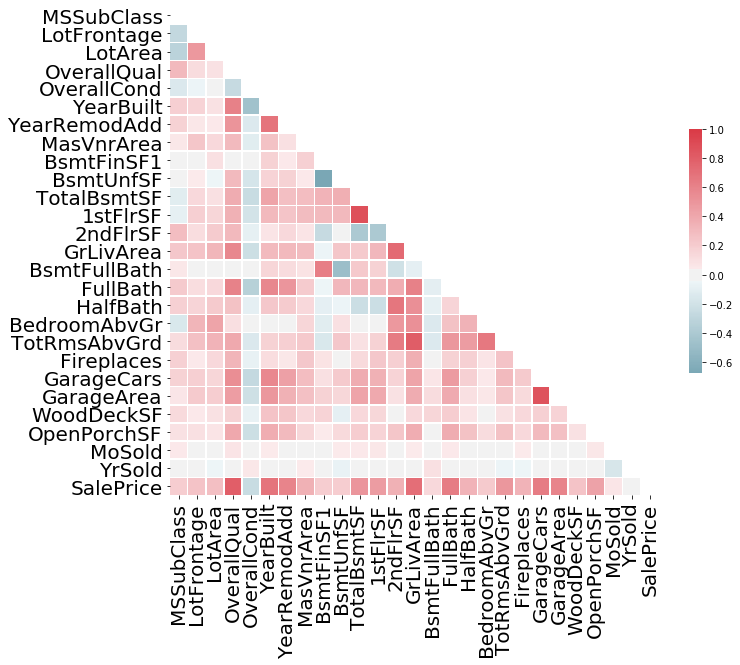

In [61]:
#To find correlation among varibales
corr = df2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap='RdYlGn')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
ax.tick_params(labelsize=20)

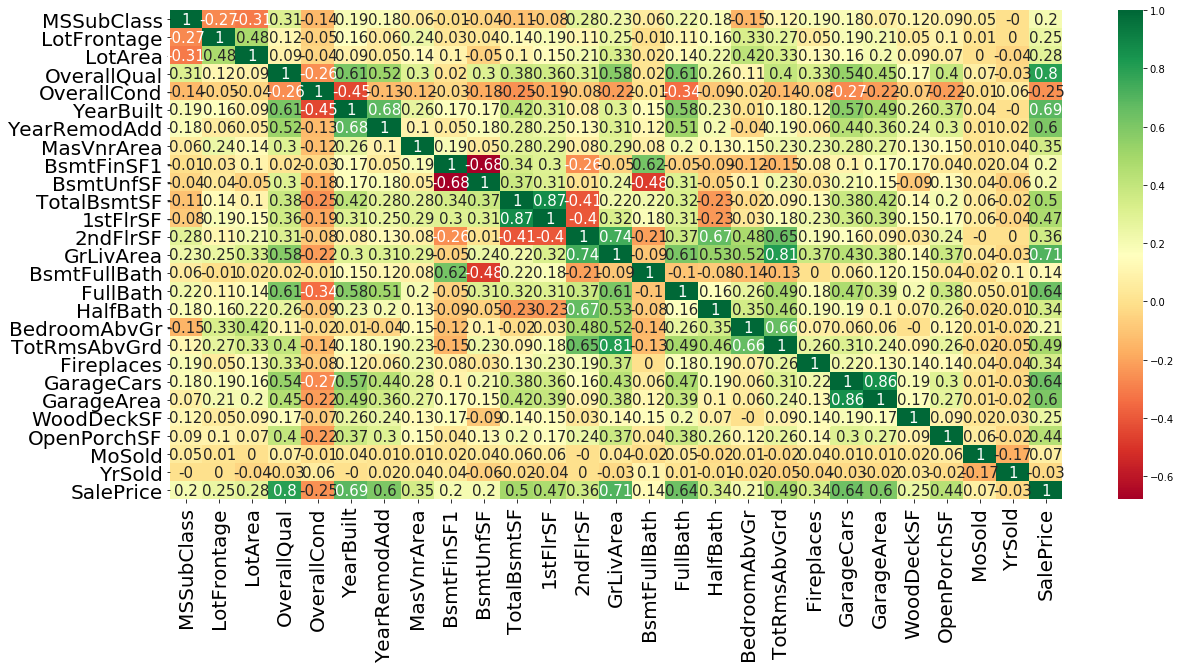

In [62]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
ax.tick_params(labelsize=20)
plt.show()

# <font color ='blue' > Sale Price Visualization


In [63]:
df2.OverallQual.unique()

array([7, 8, 5, 6, 4, 9, 3, 2])

In [64]:
#pivot table of Overall Quality & Sale price
quality_pivot = df2.pivot_table(index= 'OverallQual', values= 'SalePrice')

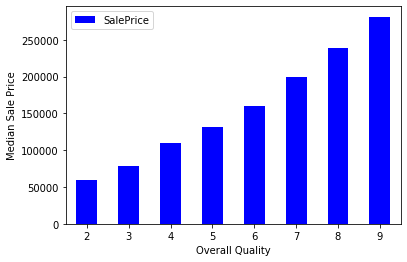

In [65]:
#plotting the pivot table
quality_pivot.plot(kind = 'bar', color = 'blue')

plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

In [66]:
len(target)

1460

In [67]:
target = np.log(df2.SalePrice)
df2.shape

(849, 40)

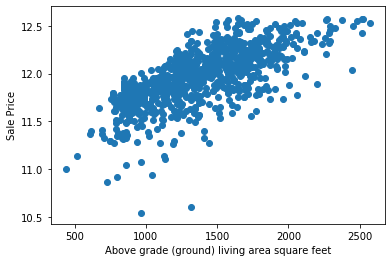

In [68]:
#Analysing the feature - ground living area 
plt.scatter(x = df2['GrLivArea'], y = target)

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.show()

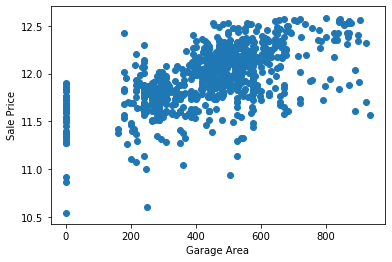

In [69]:
#Analysing the feature - garage area
plt.scatter(x = df2['GarageArea'], y = target)

plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [70]:
df2.shape

(849, 40)

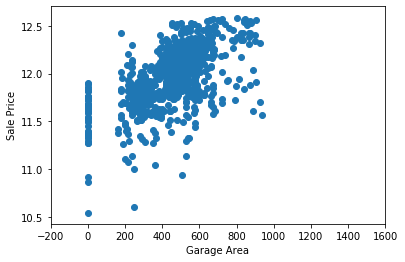

In [71]:
plt.scatter(x = df2['GarageArea'], y = np.log(df2.SalePrice))

plt.xlim(-200, 1600)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [72]:
df2.shape

(849, 40)

In [73]:
df2[df2.GarageArea == 0].shape

(37, 40)

# Step : 4 
# <font color ='blue' >Feature Selection


In [76]:
df2.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [77]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [78]:
X.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  849.000000   849.000000    849.000000   849.000000   849.000000   
mean    48.445230    68.063008   9107.118963     5.926973     5.522968   
std     30.281652    13.149314   2550.845562     1.141763     0.808127   
min     20.000000    32.000000   2887.000000     2.000000     4.000000   
25%     20.000000    60.000000   7560.000000     5.000000     5.000000   
50%     50.000000    70.049958   9060.000000     6.000000     5.000000   
75%     60.000000    75.000000  10625.000000     7.000000     6.000000   
max    120.000000   107.000000  16381.000000     9.000000     7.000000   

         YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1    BsmtUnfSF  ...  \
count   849.000000    849.000000  849.000000   849.000000   849.000000  ...   
mean   1971.676090   1983.054181   62.456333   406.742049   566.362780  ...   
std      28.925488     20.990438   98.702828   372.749835   395.306172  ...   
min    1885.000000   1950.000000    0.000000     0.000000     0.000000  ...   
25%    1954.000000   1963.000000    0.000000     0.000000   254.000000  ...   
50%    1972.000000   1990.000000    0.000000   384.000000   501.000000  ...   
75%    2000.000000   2003.000000  110.000000   674.000000   808.000000  ...   
max    2009.000000   2010.000000  396.000000  1606.000000  1652.000000  ...   

         HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
count  849.000000    849.000000    849.000000  849.000000   849.00000   
mean     0.347468      2.789164      6.160188    0.524146     1.67609   
std      0.495852      0.668761      1.259031    0.586558     0.65510   
min      0.000000      1.000000      3.000000    0.000000     0.00000   
25%      0.000000      2.000000      5.000000    0.000000     1.00000   
50%      0.000000      3.000000      6.000000    0.000000     2.00000   
75%      1.000000      3.000000      7.000000    1.000000     2.00000   
max      2.000000      4.000000     10.000000    2.000000     3.00000   

       GarageArea  WoodDeckSF  OpenPorchSF      MoSold       YrSold  
count  849.000000  849.000000   849.000000  849.000000   849.000000  
mean   444.206125   80.286219    31.256773    6.263840  2007.795053  
std    179.005049  101.603195    40.367212    2.695406     1.331025  
min      0.000000    0.000000     0.000000    1.000000  2006.000000  
25%    308.000000    0.000000     0.000000    4.000000  2007.000000  
50%    459.000000    0.000000     0.000000    6.000000  2008.000000  
75%    552.000000  148.000000    53.000000    8.000000  2009.000000  
max    936.000000  403.000000   155.000000   12.000000  2010.000000  

[8 rows x 26 columns]

In [79]:
 X.shape 

(849, 39)

# step 5 Data Preparation
- Converting categorical variables to dummy variables

In [80]:
## Converting all values into ordered numbers 

X['ExterQual'] = X.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
X['BsmtQual'] = X.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
X['BsmtFinType1'] = X.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
X['HeatingQC'] = X.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
X['KitchenQual'] = X.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
X['GarageFinish'] = X.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
X['LotShape'] = X.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [81]:
df2_categorical = X.select_dtypes(include=["object"])
df2_categorical.head()

Neighborhood HouseStyle Exterior1st Exterior2nd MasVnrType Foundation
0      CollgCr     2Story     VinylSd     VinylSd    BrkFace      PConc
2      CollgCr     2Story     VinylSd     VinylSd    BrkFace      PConc
3      Crawfor     2Story     Wd Sdng     Wd Shng       None     BrkTil
4      NoRidge     2Story     VinylSd     VinylSd    BrkFace      PConc
5      Mitchel     1.5Fin     VinylSd     VinylSd       None       Wood

In [82]:
df_dummies = pd.get_dummies(df2_categorical,drop_first=True)
df_dummies.head()

Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   
5                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   
5                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   
5                    0                     0                     1   

   Neighborhood_NAmes  ...  Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  \
0                   0  ...                    1                    0   
2                   0  ...                    1                    0   
3                   0  ...                    0                    0   
4                   0  ...                    1                    0   
5                   0  ...                    1                    0   

   Exterior2nd_Wd Shng  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  \
0                    0                   1                0                 0   
2                    0                   1                0                 0   
3                    1                   0                1                 0   
4                    0                   1                0                 0   
5                    0                   0                1                 0   

   Foundation_CBlock  Foundation_PConc  Foundation_Stone  Foundation_Wood  
0                  0                 1                 0                0  
2                  0                 1                 0                0  
3                  0                 0                 0                0  
4                  0                 1                 0                0  
5                  0                 0                 0                1  

[5 rows x 60 columns]

In [83]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold'],
      dtype='object')

In [84]:
# drop categorical variables 
X = X.drop(columns=list(df2_categorical.columns), axis=1)
X.head(3)


MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0          60         65.0     8450         3            7            5   
2          60         68.0    11250         0            7            5   
3          70         60.0     9550         0            7            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  KitchenQual  \
0       2003          2003       196.0          3  ...            3   
2       2001          2002       162.0          3  ...            3   
3       1915          1970         0.0          2  ...            3   

   TotRmsAbvGrd  Fireplaces  GarageFinish  GarageCars  GarageArea  WoodDeckSF  \
0             8           0             2           2         548           0   
2             6           1             2           2         608           0   
3             7           1             1           3         642           0   

   OpenPorchSF  MoSold  YrSold  
0           61       2    2008  
2           42       9    2008  
3           35       2    2006  

[3 rows x 33 columns]

In [85]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)
print(X.shape)
X.head()

(849, 93)


MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0          60         65.0     8450         3            7            5   
2          60         68.0    11250         0            7            5   
3          70         60.0     9550         0            7            5   
4          60         84.0    14260         0            8            5   
5          50         85.0    14115         0            5            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  Exterior2nd_VinylSd  \
0       2003          2003       196.0          3  ...                    1   
2       2001          2002       162.0          3  ...                    1   
3       1915          1970         0.0          2  ...                    0   
4       2000          2000       350.0          3  ...                    1   
5       1993          1995         0.0          2  ...                    1   

   Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  MasVnrType_BrkFace  \
0                    0                    0                   1   
2                    0                    0                   1   
3                    0                    1                   0   
4                    0                    0                   1   
5                    0                    0                   0   

   MasVnrType_None  MasVnrType_Stone  Foundation_CBlock  Foundation_PConc  \
0                0                 0                  0                 1   
2                0                 0                  0                 1   
3                1                 0                  0                 0   
4                0                 0                  0                 1   
5                1                 0                  0                 0   

   Foundation_Stone  Foundation_Wood  
0                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  
5                 0                1  

[5 rows x 93 columns]

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 0 to 1458
Data columns (total 93 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            849 non-null    int64  
 1   LotFrontage           849 non-null    float64
 2   LotArea               849 non-null    int64  
 3   LotShape              849 non-null    int64  
 4   OverallQual           849 non-null    int64  
 5   OverallCond           849 non-null    int64  
 6   YearBuilt             849 non-null    int64  
 7   YearRemodAdd          849 non-null    int64  
 8   MasVnrArea            849 non-null    float64
 9   ExterQual             849 non-null    int64  
 10  BsmtQual              849 non-null    int64  
 11  BsmtFinType1          849 non-null    int64  
 12  BsmtFinSF1            849 non-null    int64  
 13  BsmtUnfSF             849 non-null    int64  
 14  TotalBsmtSF           849 non-null    int64  
 15  HeatingQC             

# <font color ='blue' > Rescaling the feature using scale

In [87]:
# scaling the features
from sklearn.preprocessing import scale, StandardScaler

In [88]:
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0          60         65.0     8450         3            7            5   
2          60         68.0    11250         0            7            5   
3          70         60.0     9550         0            7            5   
4          60         84.0    14260         0            8            5   
5          50         85.0    14115         0            5            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  Exterior2nd_VinylSd  \
0       2003          2003       196.0          3  ...                    1   
2       2001          2002       162.0          3  ...                    1   
3       1915          1970         0.0          2  ...                    0   
4       2000          2000       350.0          3  ...                    1   
5       1993          1995         0.0          2  ...                    1   

   Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  MasVnrType_BrkFace  \
0                    0                    0                   1   
2                    0                    0                   1   
3                    0                    1                   0   
4                    0                    0                   1   
5                    0                    0                   0   

   MasVnrType_None  MasVnrType_Stone  Foundation_CBlock  Foundation_PConc  \
0                0                 0                  0                 1   
2                0                 0                  0                 1   
3                1                 0                  0                 0   
4                0                 0                  0                 1   
5                1                 0                  0                 0   

   Foundation_Stone  Foundation_Wood  
0                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  
5                 0                1  

[5 rows x 93 columns]

In [89]:
X.shape

(849, 93)

# <font color ='blue' > Split the dataset in Train & Test

In [90]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70,test_size = 0.30, random_state=1)

In [91]:
X_train.shape , X_test.shape

((594, 93), (255, 93))

In [92]:

print(len(dataframe_columns_name))
print(dataframe_columns_name)

27
['LotFrontage', 'MasVnrArea', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']


In [93]:
num_col = ['LotFrontage', 'MasVnrArea', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
           'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
           'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']

In [94]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

X_test[num_col] = scaler.transform(X_test[num_col])

# step 6 Model Building


# <font color ='Green' > Model Building using Ridge

In [95]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


folds = KFold(n_splits=5,shuffle=True,random_state=42)


ridge = Ridge()


model_ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

# <font color ='Green' > Best Params finding

In [96]:
print(model_ridge_cv.best_score_ )
print(model_ridge_cv.best_params_ )
print(model_ridge_cv.best_estimator_ )
print(model_ridge_cv.best_index_ )

-11640.913223253268
{'alpha': 5.0}
Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
17


In [97]:
ridge_alpha = model_ridge_cv.best_params_['alpha'] 
ridge_alpha

5.0

# <font color ='blue' > Model Evalaution Metrics

In [98]:
def rmse(y_actual , y_pred):
    return np.sqrt(mean_squared_error(y_actual, y_pred))

def reg_evaluation(y_actual, y_pred, data_type):
    print("Model Evaluation Dataset Type is  : ", data_type)
    print("\n")
    
    print("Accuracy  :  ", r2_score(y_actual, y_pred))
    print("MAE       :  ", mean_absolute_error(y_actual, y_pred))
#     print("MSLE      :  ", mean_squared_log_error(y_actual, y_pred))
    print("MSE       :  ", mean_squared_error(y_actual, y_pred))
    print("RMSE      :  ", np.sqrt(mean_squared_error(y_actual, y_pred)))
    
    

# <font color ='Green' > Checking Model Accuracy and Performance

In [99]:
y_train_ridge_pred = model_ridge_cv.predict(X_train)

reg_evaluation(y_train, y_train_ridge_pred, "Train")

Model Evaluation Dataset Type is  :  Train


Accuracy  :   0.9102205925107778
MAE       :   10147.403669548163
MSE       :   189816127.09514564
RMSE      :   13777.377366362063


In [100]:
y_test_ridge_pred = model_ridge_cv.predict(X_test)

reg_evaluation(y_test, y_test_ridge_pred, "Test")

Model Evaluation Dataset Type is  :  Test


Accuracy  :   0.901177088879965
MAE       :   11001.42186946645
MSE       :   243177046.45200488
RMSE      :   15594.135001724362


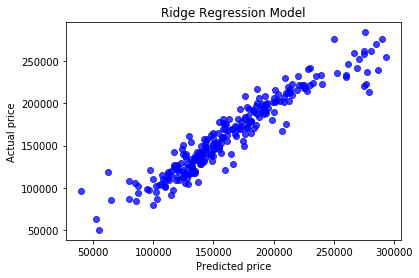

In [101]:
actual_values = y_test
plt.scatter(actual_values, y_test_ridge_pred, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Ridge Regression Model')
plt.show()

In [102]:
cv_results_ridge = pd.DataFrame(model_ridge_cv.cv_results_)
cv_results_ridge = cv_results_ridge[cv_results_ridge['param_alpha'] < 200]
cv_results_ridge.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.075600      0.142588         0.002078        0.001294      0.0001   
1       0.003702      0.001088         0.001342        0.000373       0.001   
2       0.003295      0.001315         0.001362        0.000544        0.01   
3       0.002536      0.000085         0.000932        0.000023        0.05   
4       0.002520      0.000070         0.000936        0.000025         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -12419.806704      -12345.199098      -10791.089925   
1   {'alpha': 0.001}      -12419.648689      -12341.047218      -10790.416891   
2    {'alpha': 0.01}      -12418.095266      -12302.834716      -10783.484577   
3    {'alpha': 0.05}      -12410.863526      -12190.657325      -10749.584618   
4     {'alpha': 0.1}      -12400.763895      -12099.371743      -10711.894208   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -12280.763256  ...    -12104.111164      670.661965               25   
1      -12277.468479  ...    -12102.515490      670.492642               24   
2      -12247.379525  ...    -12087.787277      669.514814               23   
3      -12155.400119  ...    -12041.341089      674.474801               22   
4      -12072.452126  ...    -11999.186794      684.267919               20   

   split0_train_score  split1_train_score  split2_train_score  \
0        -9577.320470        -9599.565820        -9977.995550   
1        -9577.297298        -9599.774517        -9977.760293   
2        -9577.595417        -9601.934152        -9975.506120   
3        -9580.167616        -9614.542871        -9968.049861   
4        -9588.683482        -9634.402642        -9964.494806   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0        -9573.590173        -9270.226636      -9599.739730       224.874542  
1        -9574.068758        -9270.487369      -9599.877647       224.708358  
2        -9578.365210        -9272.709389      -9601.222058       223.199594  
3        -9596.432718        -9279.383118      -9607.715237       218.438003  
4        -9619.161854        -9287.833933      -9618.915343       214.566516  

[5 rows x 21 columns]

# <font color ='Green' > Train score and Test score alpha Visualization  

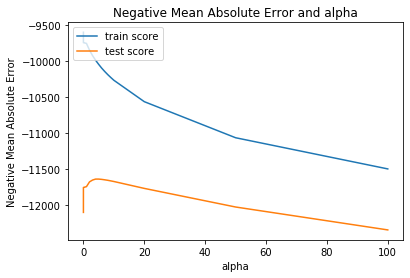

In [103]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
# plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

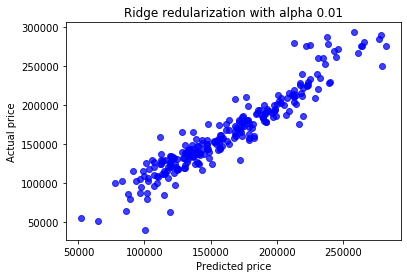

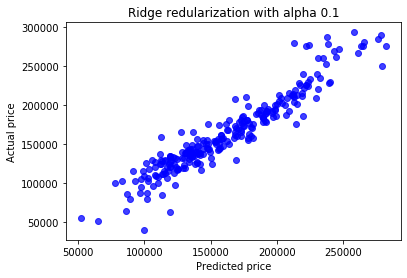

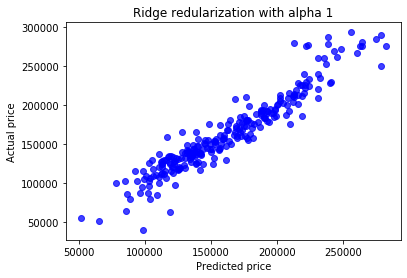

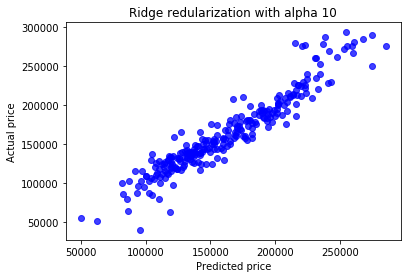

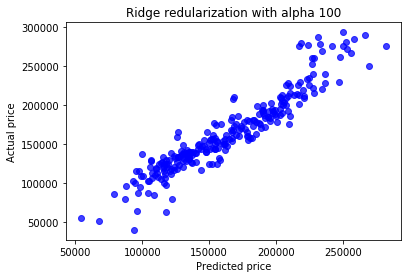

In [104]:
#Linear regression with L2 regularization
for i in range(-2, 3):
    alpha = 10**i
    rm = Ridge(alpha = alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, y_test, alpha= 0.75, c= 'b')
    plt.xlabel('Predicted price')
    plt.ylabel('Actual price')
    plt.title('Ridge redularization with alpha {}'.format(alpha))
    overlay = 'R square: {} \nRMSE: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s = overlay, xy = (12.1, 10.6), size = 'x-large')
    plt.show()

# <font color ='Green' > Model Building using Lasso


In [105]:
lasso = Lasso()

# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)

# cross validation
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
#                         scoring= 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

# <font color ='Green' > Best Params finding


In [106]:
print(model_lasso_cv.best_score_ )
print(model_lasso_cv.best_params_ )
print(model_lasso_cv.best_estimator_ )
print(model_lasso_cv.best_index_ )

-11734.193541019647
{'alpha': 50}
Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
24


In [107]:
lasso_alpha = model_lasso_cv.best_params_['alpha'] 
lasso_alpha

50

# <font color ='Green' > Checking Model Accuracy and Performance

In [108]:
y_train_lasso_pred = model_lasso_cv.predict(X_train)

reg_evaluation(y_train, y_train_lasso_pred, "Train")

Model Evaluation Dataset Type is  :  Train


Accuracy  :   0.908858309686088
MAE       :   10253.29070082831
MSE       :   192696333.78198415
RMSE      :   13881.51050073385


In [109]:
y_test_lasso_pred = model_lasso_cv.predict(X_test)

reg_evaluation(y_test, y_test_lasso_pred, "Test")

Model Evaluation Dataset Type is  :  Test


Accuracy  :   0.9004847150080671
MAE       :   10951.938545817757
MSE       :   244880795.42378056
RMSE      :   15648.667528699705


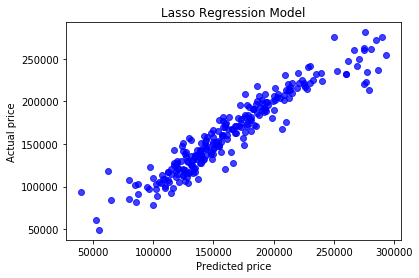

In [110]:
actual_values = y_test
plt.scatter(actual_values, y_test_lasso_pred, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Lasso Regression Model')
plt.show()

In [111]:
cv_results = pd.DataFrame(model_lasso_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.047613      0.029365         0.001650        0.000559      0.0001   
1       0.032789      0.004508         0.001422        0.000382       0.001   
2       0.034301      0.005960         0.001154        0.000061        0.01   
3       0.026905      0.001380         0.001026        0.000035        0.05   
4       0.026782      0.001426         0.001023        0.000015         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -12420.107263      -12350.110537      -10841.088496   
1   {'alpha': 0.001}      -12420.099723      -12349.995481      -10840.844941   
2    {'alpha': 0.01}      -12420.024327      -12348.854395      -10838.411991   
3    {'alpha': 0.05}      -12419.575053      -12344.052356      -10830.069308   
4     {'alpha': 0.1}      -12419.057339      -12338.552082      -10820.056289   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -12228.633756  ...    -12104.547226      648.995630               26   
1      -12228.578630  ...    -12104.464319      649.080115               25   
2      -12228.026700  ...    -12103.626148      649.914587               24   
3      -12225.559234  ...    -12100.424429      652.673111               23   
4      -12222.448450  ...    -12096.754522      656.133938               22   

   split0_train_score  split1_train_score  split2_train_score  \
0        -9578.456981        -9600.132880        -9978.017010   
1        -9578.441985        -9600.123373        -9978.009427   
2        -9578.323719        -9600.063462        -9977.933599   
3        -9577.827421        -9599.905013        -9977.619790   
4        -9577.300444        -9599.858096        -9977.221535   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0        -9575.790933        -9270.817773      -9600.643115       224.635673  
1        -9575.799690        -9270.828542      -9600.640603       224.630070  
2        -9575.887337        -9270.958301      -9600.633284       224.566928  
3        -9576.278659        -9271.609866      -9600.648150       224.271719  
4        -9576.771426        -9272.360760      -9600.702452       223.917819  

[5 rows x 21 columns]

# <font color ='Green' > Train score and Test score alpha Visualization  

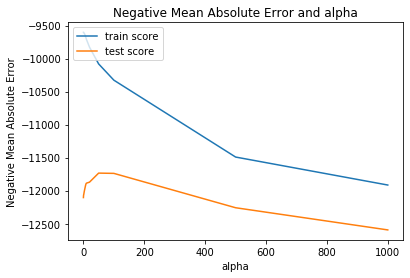

In [112]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
# plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

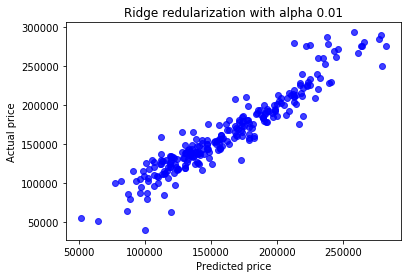

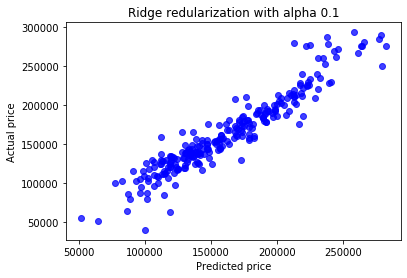

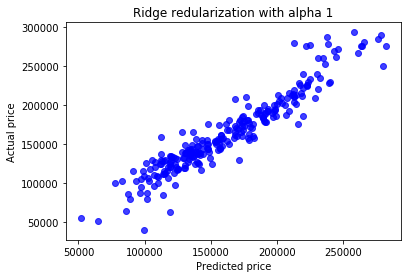

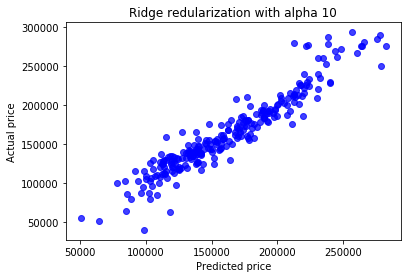

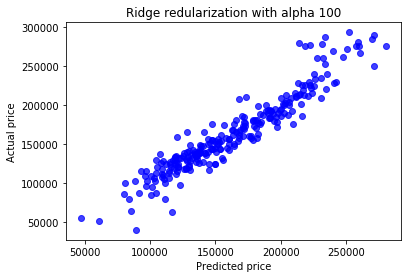

In [113]:
#Linear regression with L2 regularization
for i in range(-2, 3):
    alpha = 10**i
    rm = Lasso(alpha = alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, y_test, alpha= 0.75, c= 'b')
    plt.xlabel('Predicted price')
    plt.ylabel('Actual price')
    plt.title('Ridge redularization with alpha {}'.format(alpha))
    overlay = 'R square: {} \nRMSE: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s = overlay, xy = (12.1, 10.6), size = 'x-large')
    plt.show()

# Final Step : Model Building using Random_State and Aplha 

# <font color ='Green' > Lasso

In [114]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70,test_size = 0.30, random_state=3)

ls = Lasso(alpha=lasso_alpha)
ls.fit(X_train, y_train)

y_train_ls_pred = ls.predict(X_train)
y_test_ls_pred = ls.predict(X_test)



reg_evaluation(y_train, y_train_ls_pred, "Train")

print("\n\n")

reg_evaluation(y_test, y_test_ls_pred, "Test")


Model Evaluation Dataset Type is  :  Train


Accuracy  :   0.9144787020519137
MAE       :   10260.993681103622
MSE       :   199915386.0244316
RMSE      :   14139.143751459336



Model Evaluation Dataset Type is  :  Test


Accuracy  :   0.8853131545577257
MAE       :   11262.130614267224
MSE       :   222423064.553881
RMSE      :   14913.854785194906


In [115]:
# <font color ='Green' > Alpha double for Lasso 


In [116]:
lasso_alpha_2 = lasso_alpha *2

print(lasso_alpha)
print(lasso_alpha_2)

ls = Lasso(alpha=lasso_alpha_2)
ls.fit(X_train, y_train)

y_train_ls_pred = ls.predict(X_train)
y_test_ls_pred = ls.predict(X_test)



reg_evaluation(y_train, y_train_ls_pred, "Train")

print("\n\n")

reg_evaluation(y_test, y_test_ls_pred, "Test")

50
100
Model Evaluation Dataset Type is  :  Train


Accuracy  :   0.9112295002477949
MAE       :   10492.666360105119
MSE       :   207510750.55381468
RMSE      :   14405.233443225232



Model Evaluation Dataset Type is  :  Test


Accuracy  :   0.8841919448659762
MAE       :   11358.272195039159
MSE       :   224597532.73011127
RMSE      :   14986.578419709793


# <font color ='Green' > Ridge

In [117]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size = 0.25, random_state=3)

rid = Ridge(alpha=ridge_alpha)
rid.fit(X_train, y_train)

y_train_rid_pred = rid.predict(X_train)
y_test_rid_pred = rid.predict(X_test)



reg_evaluation(y_train, y_train_rid_pred, "Train")

print("\n\n")

reg_evaluation(y_test, y_test_rid_pred, "Test")

Model Evaluation Dataset Type is  :  Train


Accuracy  :   0.9136393861126622
MAE       :   10177.692177992576
MSE       :   198529701.14358273
RMSE      :   14090.056818323435



Model Evaluation Dataset Type is  :  Test


Accuracy  :   0.8878416535455262
MAE       :   11311.100583787154
MSE       :   221945229.84900698
RMSE      :   14897.826346450915


In [118]:
ridge_alpha

5.0

In [119]:
ridge_alpha_2 = ridge_alpha *2

print(ridge_alpha_2)
rid = Ridge(alpha=ridge_alpha_2)
rid.fit(X_train, y_train)

y_train_rid_pred = rid.predict(X_train)
y_test_rid_pred = rid.predict(X_test)



reg_evaluation(y_train, y_train_rid_pred, "Train")

print("\n\n")

reg_evaluation(y_test, y_test_rid_pred, "Test")

10.0
Model Evaluation Dataset Type is  :  Train


Accuracy  :   0.9117202670207247
MAE       :   10329.578398203326
MSE       :   202941459.2660796
RMSE      :   14245.75232362544



Model Evaluation Dataset Type is  :  Test


Accuracy  :   0.8866653756566039
MAE       :   11400.127899150642
MSE       :   224272914.54369143
RMSE      :   14975.744206672716


# SUBJECTIVE QUESTION 3 

# <font color ='Red' > Lasso select top 5 featues based on higest cofficient

In [120]:
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Train Accuracy : ", r2_score(y_train, y_train_pred))
print("Test  Accuracy : ", r2_score(y_test, y_test_pred))

Train Accuracy :  0.9126768707836572
Test  Accuracy :  0.8889908198409223


In [121]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)

cols = X.columns
cols.insert(0,'const')

lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [122]:
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

Featuere          Coef
37  Neighborhood_Edwards  14553.964209
53   Neighborhood_Timber   9772.785227
52  Neighborhood_StoneBr   8850.647704
34  Neighborhood_ClearCr   8641.277320
5            OverallCond   8593.029947

In [123]:
df_lasso = lasso_coef.sort_values(by='Coef',ascending=False).head(5)
df_lasso["Featuere"].values

array(['Neighborhood_Edwards', 'Neighborhood_Timber',
       'Neighborhood_StoneBr', 'Neighborhood_ClearCr', 'OverallCond'],
      dtype=object)

In [124]:
top_5_features = list(df_lasso["Featuere"].values)
print(top_5_features)

['Neighborhood_Edwards', 'Neighborhood_Timber', 'Neighborhood_StoneBr', 'Neighborhood_ClearCr', 'OverallCond']


# <font color ='Red' > Drop top 5 featues based on higest cofficient 

In [125]:
X_new = X.drop(top_5_features, axis=1)

In [126]:
X.shape, X_new.shape

((849, 93), (849, 88))

In [127]:
# split into train and test
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, train_size=0.75,test_size = 0.25, random_state=3)

In [128]:
lasso_new = Lasso(alpha=lasso_alpha)
lasso_new.fit(X_train_new,y_train)

y_train_pred_new = lasso_new.predict(X_train_new)
y_test_pred_new = lasso_new.predict(X_test_new)

print(r2_score( y_train, y_train_pred_new))
print(r2_score( y_test, y_test_pred_new))

0.9055248196841681
0.8794528081441214


In [129]:
X.shape, X_new.shape, X_train_new.shape, X_test_new.shape

((849, 93), (849, 88), (636, 88), (213, 88))

In [130]:
model_param_new = list(lasso_new.coef_)
model_param_new.insert(0,lasso_new.intercept_)

cols_new = X_new.columns
cols_new.insert(0,'const')

lasso_coef_new = pd.DataFrame(list(zip(cols_new,model_param_new)))
lasso_coef_new.columns = ['Featuere New','Coef New']

In [131]:
lasso_coef_new = lasso_coef_new.sort_values(by='Coef New',ascending=False).head(5)
lasso_coef_new

Featuere New      Coef New
35  Neighborhood_Gilbert  17180.442210
33  Neighborhood_CollgCr  12393.440361
5              YearBuilt   9825.571186
44  Neighborhood_OldTown   8542.299633
49  Neighborhood_Veenker   8330.003690

In [132]:
top_5_features_new = list(lasso_coef_new["Featuere New"].values)
print(top_5_features_new)

['Neighborhood_Gilbert', 'Neighborhood_CollgCr', 'YearBuilt', 'Neighborhood_OldTown', 'Neighborhood_Veenker']


# <font color ='Green' > Extra : Checking Model Performance using many Algorithm based on Random State

In [133]:
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)
    

In [134]:
def mean_absolute_percentage_error(y_true, y_pred) :
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(np.abs( (y_true - y_pred) / 100) ) * 100


def root_mean_sequare_error(y_true, y_pred) : 
    mse = mean_squared_error(y_true,  y_pred)  
    return np.sqrt(mse)
   

rows=[]


def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.30 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = r2_score(y_train, y_pred_train)
            train_acc = round(train_acc, 2) * 100
            
            test_acc = r2_score(y_test, y_pred)
            test_acc = round(test_acc, 2) * 100
            
            mape = mean_absolute_percentage_error(y_test, y_pred)
            mape = round(mape, 2)
            
            mae = mean_absolute_error(y_test, y_pred)   
            mae = round(mae, 2)
            
            mse = mean_squared_error(y_test, y_pred)
            mse = round(mse, 2)
            
            rmse = root_mean_sequare_error(y_test, y_pred)
            rmse = round(rmse, 2)

            row = [names[j],   i,   train_acc, test_acc,  mae,    mse]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)

In [135]:
print("Best Lasso Aplha Value : ", lasso_alpha)
print("Best Ridge Aplha Value : ", ridge_alpha)

Best Lasso Aplha Value :  50
Best Ridge Aplha Value :  5.0


In [136]:
names_regression = [ "Lasso", "Ridge"]
algorithms = [ Lasso(alpha=lasso_alpha), Ridge(alpha=ridge_alpha)]

columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc",   "MAE",   "MSE"]

random_state_list_up_to_10 = [0,1,2,3,4,5,6,7,8,9,10]


In [137]:
addRandomStateForAlgorithm(X,y,names_regression,algorithms,columns_name,random_state_list_up_to_10)

    Model  Random_state  Train_acc  Test_acc       MAE           MSE
0   Lasso             0       92.0      88.0  12153.85  2.861898e+08
1   Lasso             1       91.0      90.0  11039.52  2.464414e+08
2   Lasso             2       90.0      92.0  10485.26  1.888795e+08
3   Lasso             3       91.0      89.0  11262.13  2.224231e+08
4   Lasso             4       92.0      88.0  11597.19  2.306749e+08
5   Lasso             5       91.0      89.0  10762.60  2.108795e+08
6   Lasso             6       91.0      90.0  10734.30  2.138003e+08
7   Lasso             7       92.0      87.0  11998.61  2.882734e+08
8   Lasso             8       92.0      88.0  11835.08  2.609918e+08
9   Lasso             9       91.0      89.0  11366.07  2.287979e+08
10  Lasso            10       91.0      90.0  11749.90  2.567237e+08
11  Ridge             0       92.0      88.0  12029.64  2.831365e+08
12  Ridge             1       91.0      90.0  11018.09  2.444238e+08
13  Ridge             2       90.0